# IMDB - Movie Rating Analysis

### Immporting Library

In [1]:
import pandas as pd

### 📅 Read the Dataset

In [2]:
movies_df = pd.read_csv(r"C:\Users\ladvi\Downloads\archive\movie.csv")
print(movies_df)
print(movies_df.shape)

       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
27273   131254        Kein Bund für's Leben (2007)   
27274   131256       Feuer, Eis & Dosenbier (2002)   
27275   131258                  The Pirates (2014)   
27276   131260                 Rentun Ruusu (2001)   
27277   131262                    Innocence (2014)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                              

In [3]:
rating_df = pd.read_csv(r"C:\Users\ladvi\Downloads\archive\rating.csv")
print(rating_df)
print(rating_df.shape)

          userId  movieId  rating            timestamp
0              1        2     3.5  2005-04-02 23:53:47
1              1       29     3.5  2005-04-02 23:31:16
2              1       32     3.5  2005-04-02 23:33:39
3              1       47     3.5  2005-04-02 23:32:07
4              1       50     3.5  2005-04-02 23:29:40
...          ...      ...     ...                  ...
20000258  138493    68954     4.5  2009-11-13 15:42:00
20000259  138493    69526     4.5  2009-12-03 18:31:48
20000260  138493    69644     3.0  2009-12-07 18:10:57
20000261  138493    70286     5.0  2009-11-13 15:42:24
20000262  138493    71619     2.5  2009-10-17 20:25:36

[20000263 rows x 4 columns]
(20000263, 4)


In [4]:
tags_df = pd.read_csv(r"C:\Users\ladvi\Downloads\archive\tag.csv")
print(tags_df)
print(tags_df.shape)

        userId  movieId            tag            timestamp
0           18     4141    Mark Waters  2009-04-24 18:19:40
1           65      208      dark hero  2013-05-10 01:41:18
2           65      353      dark hero  2013-05-10 01:41:19
3           65      521  noir thriller  2013-05-10 01:39:43
4           65      592      dark hero  2013-05-10 01:41:18
...        ...      ...            ...                  ...
465559  138446    55999        dragged  2013-01-23 23:29:32
465560  138446    55999  Jason Bateman  2013-01-23 23:29:38
465561  138446    55999         quirky  2013-01-23 23:29:38
465562  138446    55999            sad  2013-01-23 23:29:32
465563  138472      923  rise to power  2007-11-02 21:12:47

[465564 rows x 4 columns]
(465564, 4)


In [5]:
print(movies_df.columns)
print(rating_df.columns)
print(tags_df.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [6]:
del rating_df["timestamp"]
del tags_df["timestamp"]

In [7]:
print(movies_df.columns)
print(rating_df.columns)
print(tags_df.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating'], dtype='object')
Index(['userId', 'movieId', 'tag'], dtype='object')


In [8]:
print(movies_df.head())
print()
print(rating_df.head())
print()
print(tags_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

   userId  movieId  rating
0       1        2     3.5
1       1       29     3.5
2       1       32     3.5
3       1       47     3.5
4       1       50     3.5

   userId  movieId            tag
0      18     4141    Mark Waters
1      65      208      dark hero
2      65      353      dark hero
3      65      521  noir thriller
4      65      592      dark hero


### 📦 Data Structures:

In [9]:
row_0 = tags_df.iloc[0]
print(type(row_0))
print(row_0)
#integer-location based indexing.

#It lets you select rows and columns strictly by their integer position, not by labels, not by names, not by conditions.


<class 'pandas.core.series.Series'>
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [10]:
row_0.index

#Why?Because df.iloc[0] returns a Series, and in a Series:

#index = labels of that Series

#For a row Series → labels are column names

Index(['userId', 'movieId', 'tag'], dtype='object')

In [11]:
'rating' in row_0

False

In [12]:
row_0.name

0

In [13]:
row_0 = row_0.rename("firstrow")   # assinging name to the row 
row_0.name

'firstrow'

### ▩ DataFrames

In [14]:
tags_df.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [15]:
tags_df.index

RangeIndex(start=0, stop=465564, step=1)

In [16]:
tags_df.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [17]:
tags_df.iloc[ [0,11,500] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


### 📈 📉 Descriptive Statistics
- Let's look how the ratings are distributed!

In [18]:
rating_df['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [19]:
rating_df.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [20]:
rating_df['rating'].mean()

np.float64(3.5255285642993797)

In [21]:
rating_df['rating'].count()

np.int64(20000263)

In [22]:
rating_df["rating"].sum()

np.float64(70511498.5)

In [23]:
rating_df.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [24]:
rating_df['rating'].min()

0.5

In [25]:
rating_df['rating'].max()

5.0

In [26]:
rating_df['rating'].std()

1.051988919275684

In [27]:
rating_df['rating'].sum()

np.float64(70511498.5)

In [28]:
rating_df['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [29]:
rating_df.corr

<bound method DataFrame.corr of           userId  movieId  rating
0              1        2     3.5
1              1       29     3.5
2              1       32     3.5
3              1       47     3.5
4              1       50     3.5
...          ...      ...     ...
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5

[20000263 rows x 3 columns]>

In [30]:
filter1 = rating_df['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


np.False_

In [31]:
filter2 = rating_df['rating'] > 0
filter2.all()

np.True_

### 🔧 Data Cleaning: Handling Missing Data

In [32]:
movies_df.shape

(27278, 3)

In [33]:
movies_df.isnull().any().any()

np.False_

In [34]:
rating_df.shape

(20000263, 3)

In [35]:
rating_df.isnull().any().any()

np.False_

In [36]:
tags_df.shape

(465564, 3)

In [37]:
tags_df.isnull().any().any()

np.True_

In [38]:
tags_df = tags_df.dropna()

In [39]:
tags_df.isnull().any().any()

np.False_

In [40]:
tags_df.shape

(465548, 3)

### 📊 Data Visualization

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,3

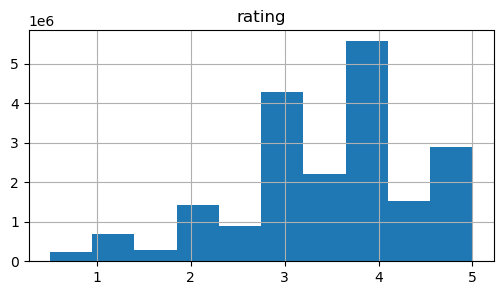

In [42]:
rating_df.hist(column='rating')
plt.show()

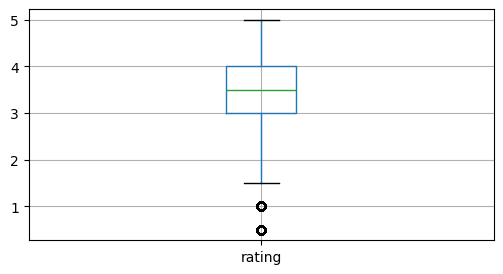

In [44]:
rating_df.boxplot(column='rating')
plt.show()

### 📤 Slicing Out Columns

In [46]:
tags_df['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [49]:
movies_df[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [51]:
rating_df[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [55]:
tag_counts = tags_df['tag'].value_counts()
tag_counts[-10:]

tag
Hell naw                      1
This is my happy face         1
I heel toe on Uday's house    1
Why?                          1
Bobo                          1
Diamond Dallas Page           1
I'm Devon Butler!             1
No arguement                  1
Really Bad                    1
Botox                         1
Name: count, dtype: int64

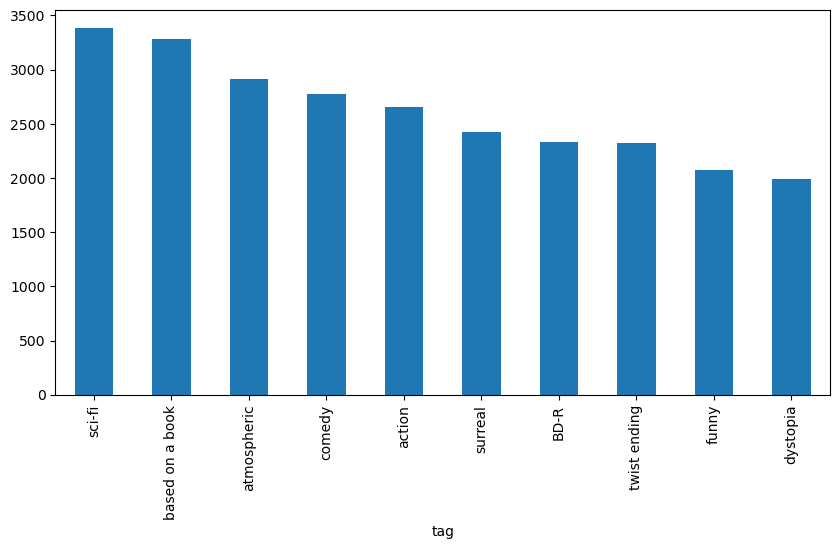

In [59]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))
plt.show()

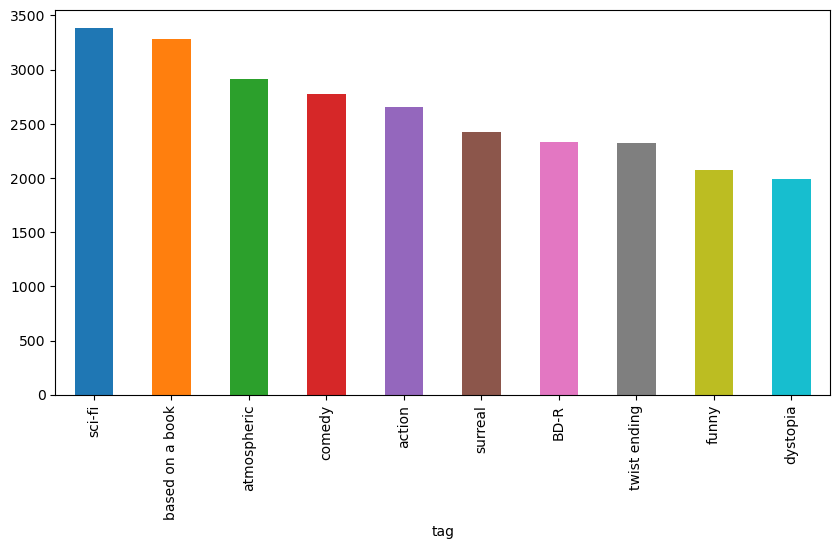

In [60]:

colors = plt.cm.tab10.colors  # 10 distinct colors

tag_counts[:10].plot(
    kind='bar',
    figsize=(10, 5),
    color=colors
)

plt.show()

### 🎣 Filters for Selecting Rows

In [65]:
is_highly_rated = rating_df['rating'] >= 5.0
rating_df[is_highly_rated][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [67]:
is_action= movies_df['genres'].str.contains('Action')
movies_df[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [69]:
movies_df[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
